Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/thread_ring/'

N = 500_000
R = 50_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 11:00:32 2025 +0100) (510.41ms ela...,6.340,0.0493,1.030,7.31,1.30,53.77,61.04 C,Nominal
1,(Sun Mar 23 11:00:32 2025 +0100) (504.67ms ela...,14.000,0.0855,1.250,15.68,1.67,85.78,60.70 C,Nominal
2,(Sun Mar 23 11:00:33 2025 +0100) (505.44ms ela...,8.380,0.0906,1.110,9.63,1.42,93.01,60.70 C,Nominal
3,(Sun Mar 23 11:00:33 2025 +0100) (508.28ms ela...,0.672,0.0432,0.522,1.27,0.48,28.90,60.29 C,Nominal
4,(Sun Mar 23 11:00:34 2025 +0100) (508.97ms ela...,0.190,0.0000,0.283,0.44,0.11,7.69,60.29 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(412, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 11:00:44 2025 +0100) (1009.15ms el...,40.2,0.1100,1.240,43.61,3.99,99.76,60.35 C,Nominal
1,(Sun Mar 23 11:00:45 2025 +0100) (1005.53ms el...,36.5,0.0698,1.390,40.18,3.87,97.77,64.28 C,Nominal
2,(Sun Mar 23 11:00:46 2025 +0100) (1006.03ms el...,36.7,0.0251,1.180,39.84,3.85,97.72,67.00 C,Nominal
3,(Sun Mar 23 11:00:47 2025 +0100) (1004.43ms el...,36.5,0.0000,1.110,39.57,3.68,98.84,69.86 C,Nominal
4,(Sun Mar 23 11:00:48 2025 +0100) (1004.55ms el...,36.8,0.0000,0.905,39.59,3.74,98.40,71.72 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:48:28 2025 +0100) (509.96ms ela...,2.930,0.0518,0.687,3.64,0.69,38.54,50.32 C,Nominal
1,(Sun Mar 23 10:48:28 2025 +0100) (505.02ms ela...,10.600,0.0842,0.997,12.04,1.31,79.51,50.39 C,Nominal
2,(Sun Mar 23 10:48:29 2025 +0100) (506.77ms ela...,5.980,0.1010,0.876,6.92,0.98,54.40,50.39 C,Nominal
3,(Sun Mar 23 10:48:29 2025 +0100) (508.39ms ela...,5.660,0.0415,0.745,6.42,0.92,51.59,50.34 C,Nominal
4,(Sun Mar 23 10:48:30 2025 +0100) (509.01ms ela...,0.238,0.0000,0.306,0.49,0.16,9.66,50.34 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(481, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:48:39 2025 +0100) (1011.19ms el...,24.10,0.0719,1.25,26.57,2.80,96.13,52.79 C,Nominal
1,(Sun Mar 23 10:48:40 2025 +0100) (1005.83ms el...,23.30,0.0634,1.01,26.31,3.07,97.37,55.60 C,Nominal
2,(Sun Mar 23 10:48:41 2025 +0100) (1007.39ms el...,9.96,0.0197,1.20,13.02,1.03,98.78,57.26 C,Nominal
3,(Sun Mar 23 10:48:42 2025 +0100) (1006.99ms el...,9.83,0.0000,1.20,12.86,1.02,98.96,58.34 C,Nominal
4,(Sun Mar 23 10:48:43 2025 +0100) (1007.28ms el...,9.84,0.0000,1.19,12.86,1.02,98.94,58.89 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 11:00:32,6.340,0.0493,1.030,7.31,1.30,53.77,61.04,Nominal,510.41
1,2025-03-23 11:00:32,14.000,0.0855,1.250,15.68,1.67,85.78,60.70,Nominal,504.67
2,2025-03-23 11:00:33,8.380,0.0906,1.110,9.63,1.42,93.01,60.70,Nominal,505.44
3,2025-03-23 11:00:33,0.672,0.0432,0.522,1.27,0.48,28.90,60.29,Nominal,508.28
4,2025-03-23 11:00:34,0.190,0.0000,0.283,0.44,0.11,7.69,60.29,Nominal,508.97


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(412, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 11:00:44,40.2,0.1100,1.240,43.61,3.99,99.76,60.35,Nominal,1009.15
1,2025-03-23 11:00:45,36.5,0.0698,1.390,40.18,3.87,97.77,64.28,Nominal,1005.53
2,2025-03-23 11:00:46,36.7,0.0251,1.180,39.84,3.85,97.72,67.00,Nominal,1006.03
3,2025-03-23 11:00:47,36.5,0.0000,1.110,39.57,3.68,98.84,69.86,Nominal,1004.43
4,2025-03-23 11:00:48,36.8,0.0000,0.905,39.59,3.74,98.40,71.72,Nominal,1004.55


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:48:28,2.930,0.0518,0.687,3.64,0.69,38.54,50.32,Nominal,509.96
1,2025-03-23 10:48:28,10.600,0.0842,0.997,12.04,1.31,79.51,50.39,Nominal,505.02
2,2025-03-23 10:48:29,5.980,0.1010,0.876,6.92,0.98,54.40,50.39,Nominal,506.77
3,2025-03-23 10:48:29,5.660,0.0415,0.745,6.42,0.92,51.59,50.34,Nominal,508.39
4,2025-03-23 10:48:30,0.238,0.0000,0.306,0.49,0.16,9.66,50.34,Nominal,509.01


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(481, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:48:39,24.10,0.0719,1.25,26.57,2.80,96.13,52.79,Nominal,1011.19
1,2025-03-23 10:48:40,23.30,0.0634,1.01,26.31,3.07,97.37,55.60,Nominal,1005.83
2,2025-03-23 10:48:41,9.96,0.0197,1.20,13.02,1.03,98.78,57.26,Nominal,1007.39
3,2025-03-23 10:48:42,9.83,0.0000,1.20,12.86,1.02,98.96,58.34,Nominal,1006.99
4,2025-03-23 10:48:43,9.84,0.0000,1.19,12.86,1.02,98.94,58.89,Nominal,1007.28


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


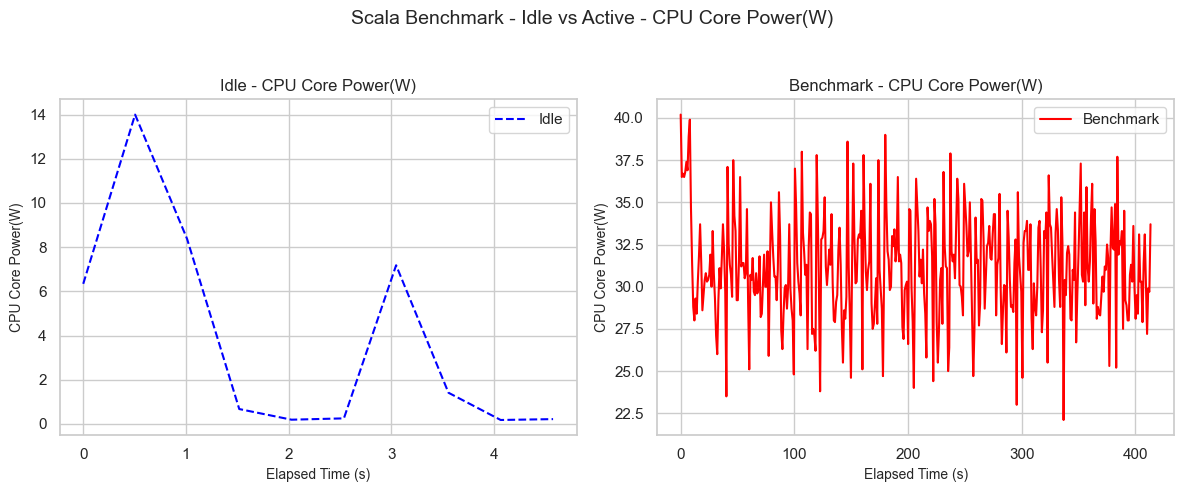

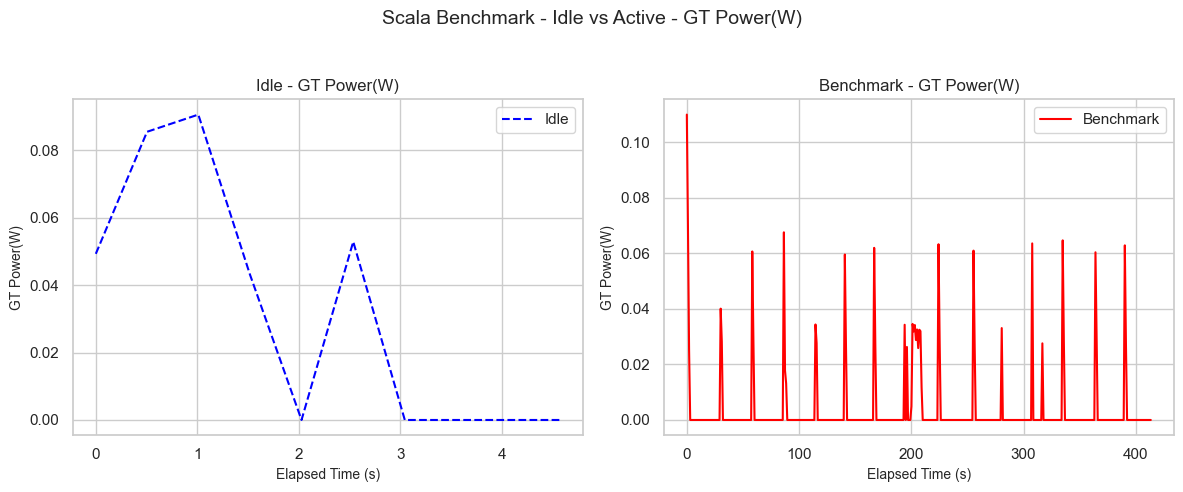

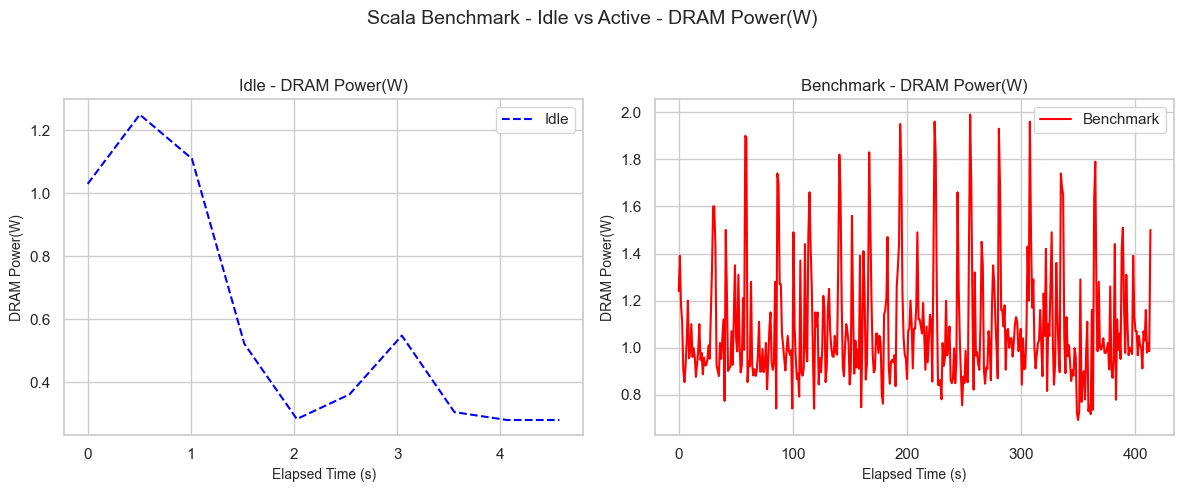

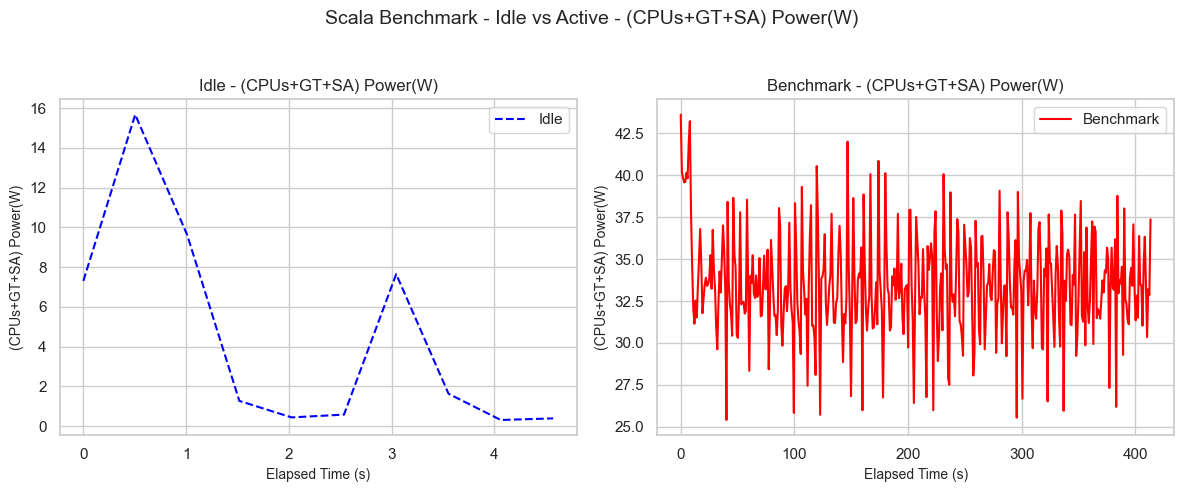

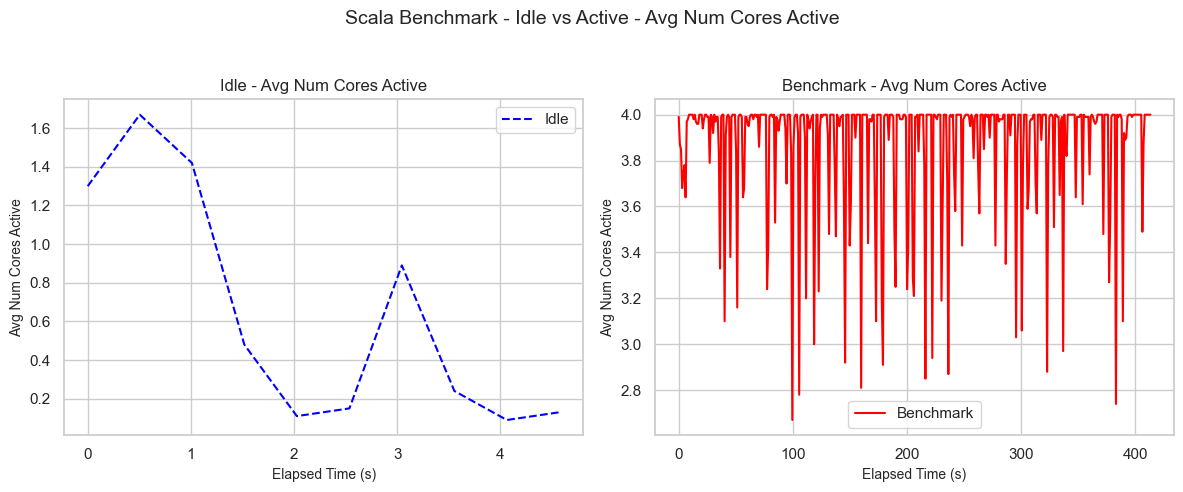

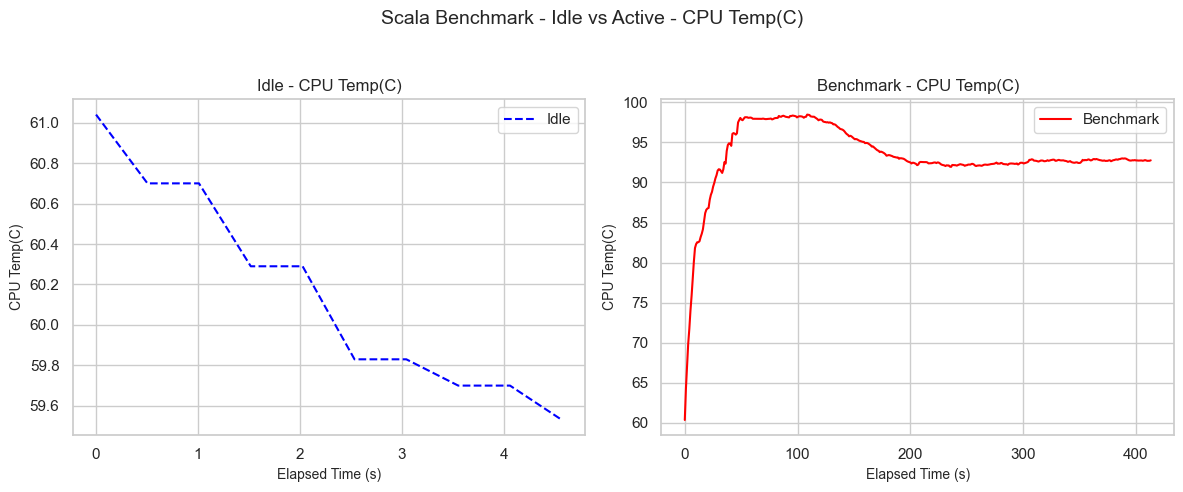

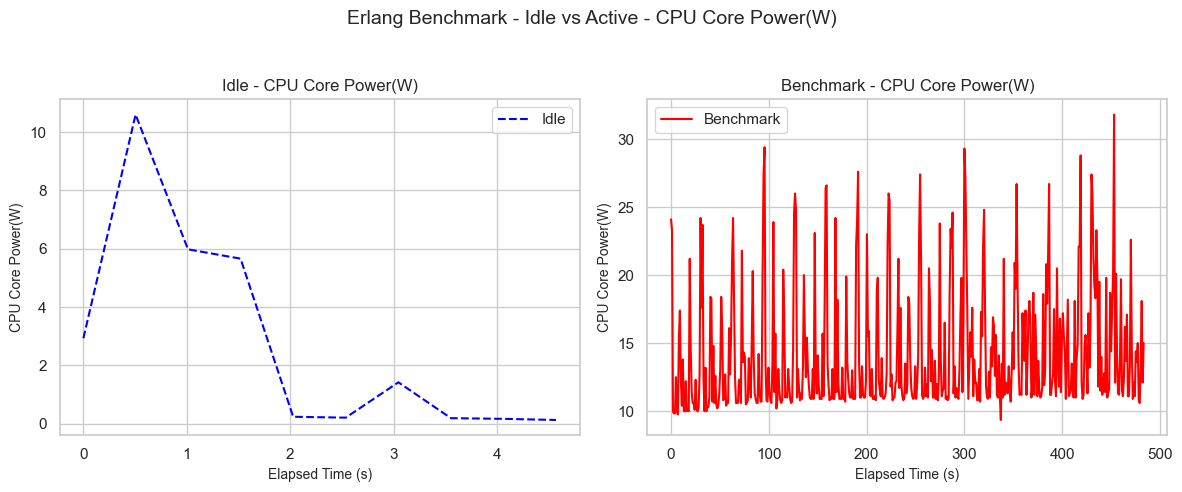

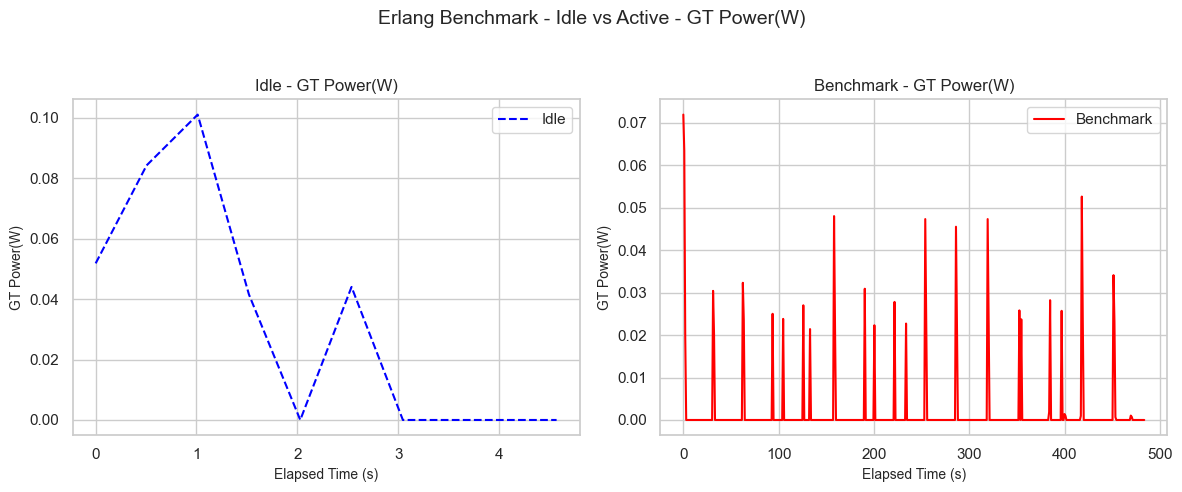

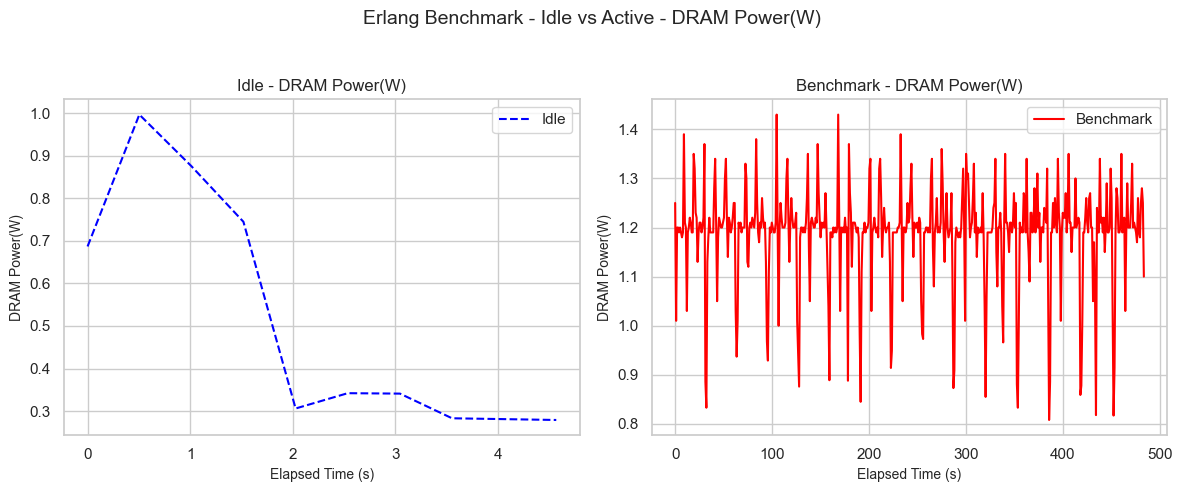

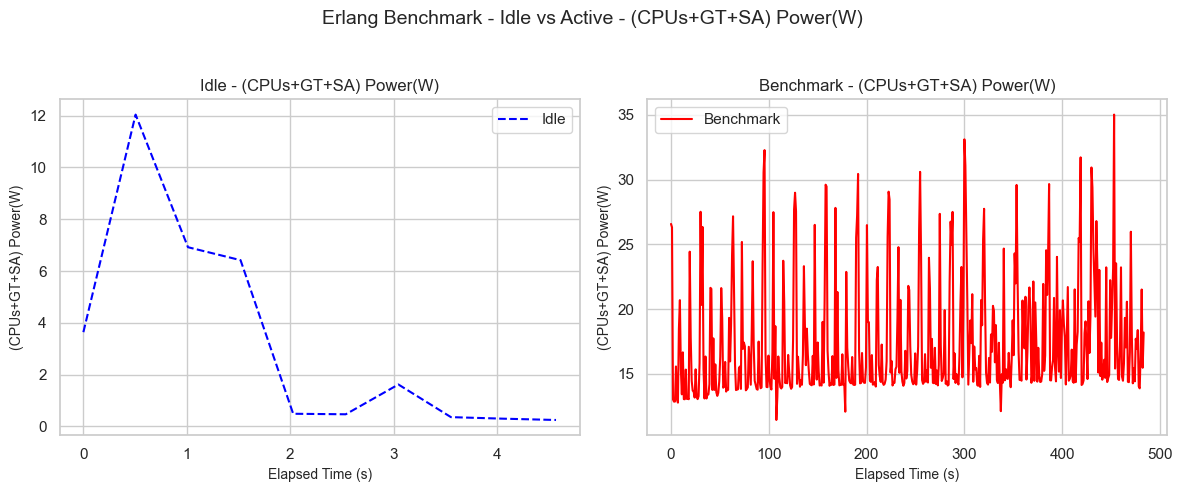

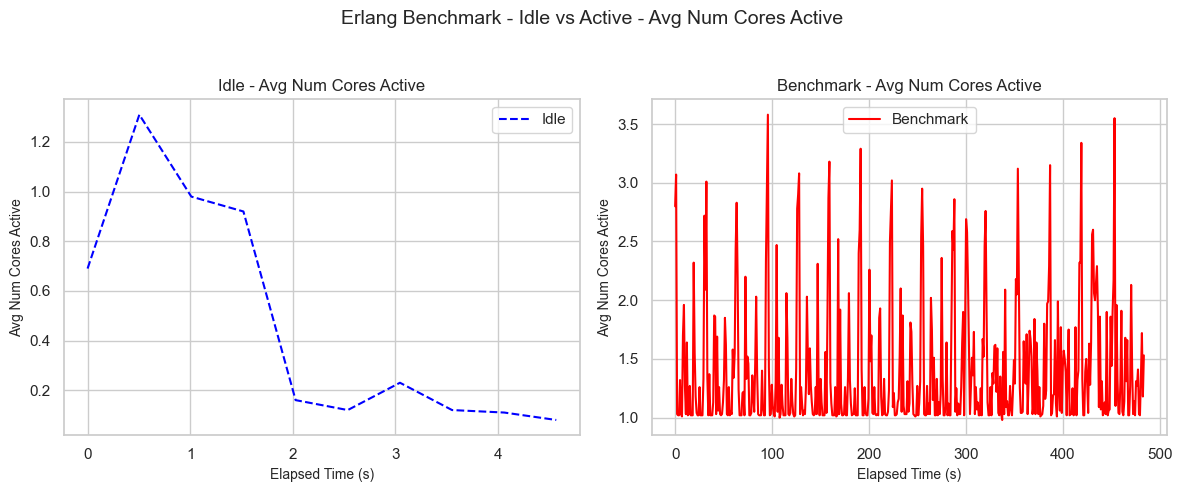

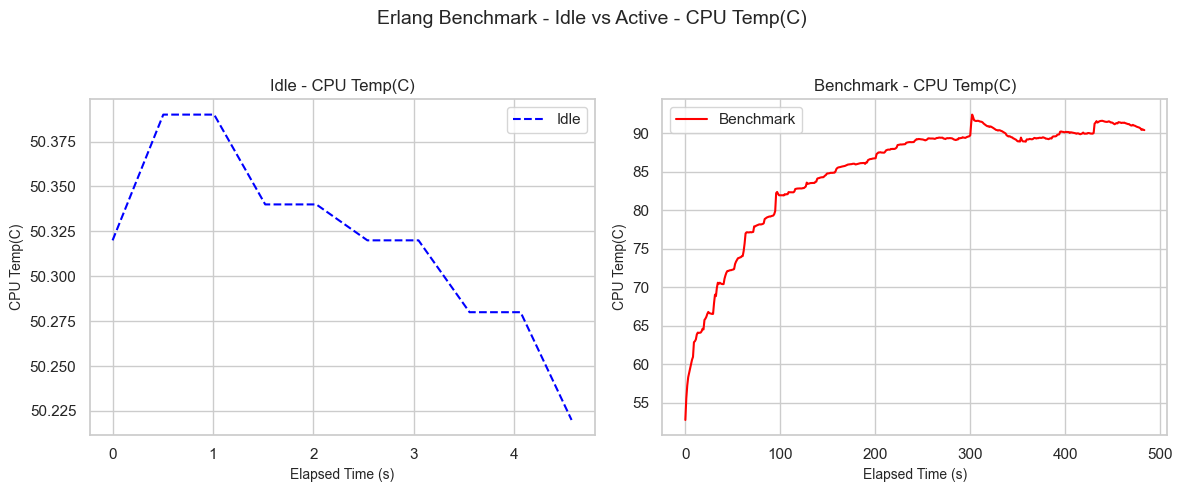

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

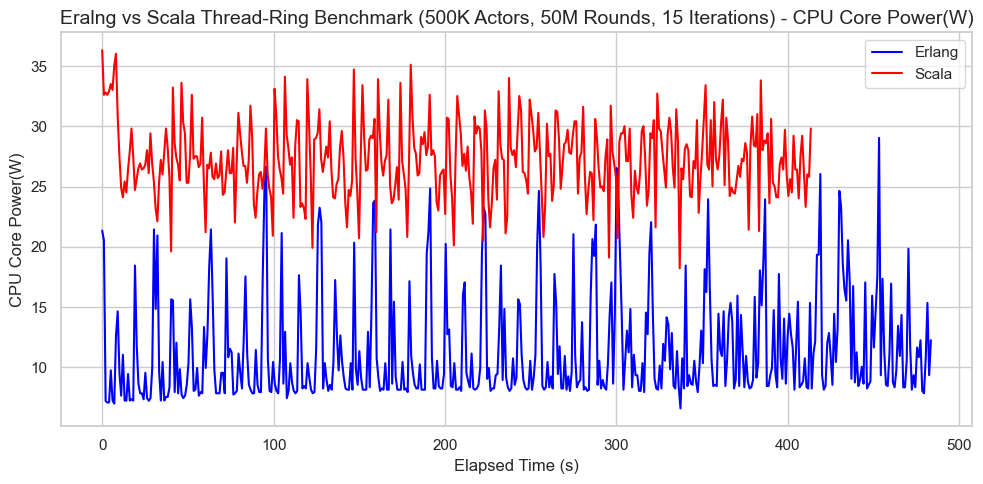

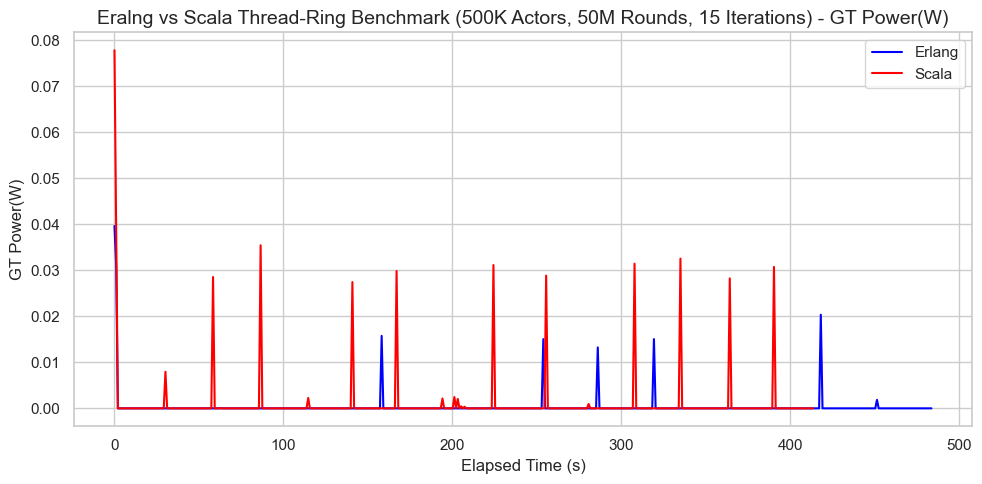

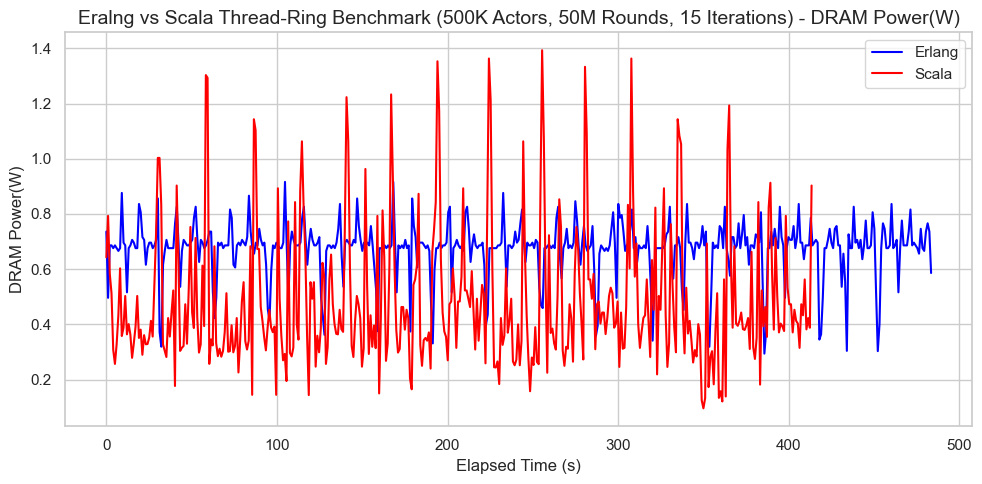

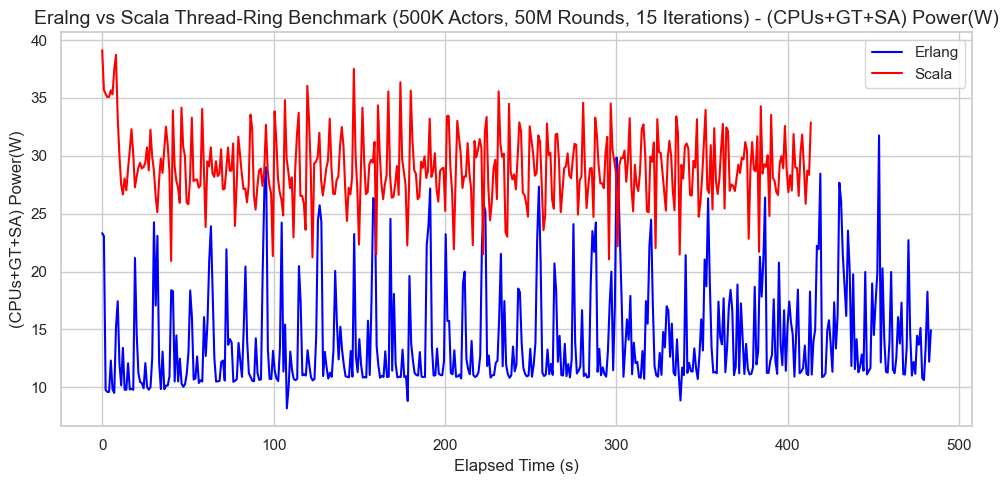

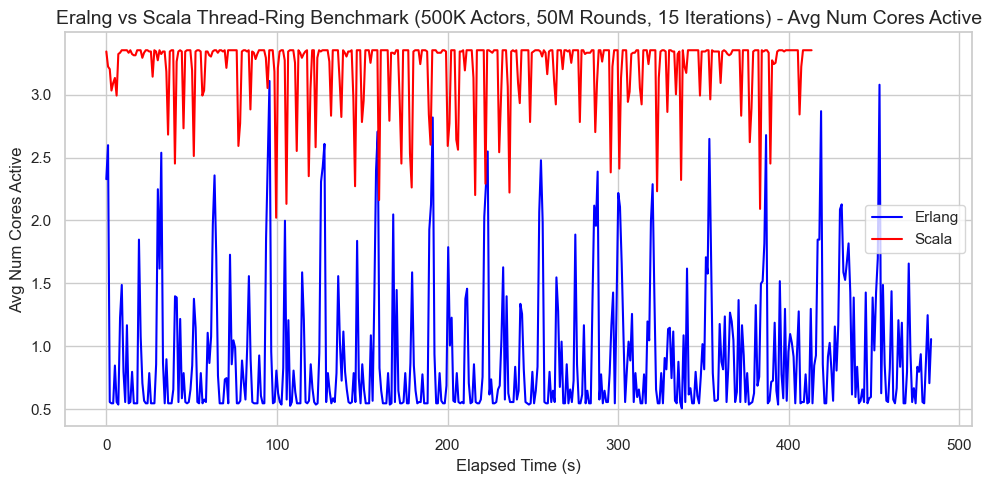

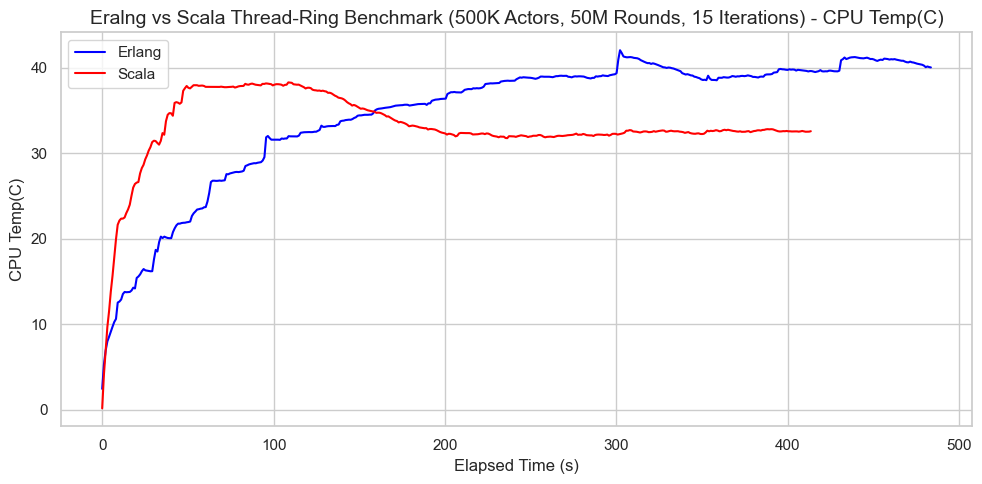

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        27.259034
GT Power(W)              -0.028252
DRAM Power(W)             0.483845
(CPUs+GT+SA) Power(W)    28.981947
CPU Temp(C)              33.103636
Avg Num Cores Active      3.227340
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.412328
GT Power(W)              -0.030194
DRAM Power(W)             0.675065
(CPUs+GT+SA) Power(W)    14.153948
CPU Temp(C)              34.635988
Avg Num Cores Active      0.933031
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 12009.663655283011 Joules
Erlang Benchmark: 6856.747639732558 Joules
